In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Softmax ----------
def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)  # numerical stability
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# ---------- One-hot encoding ----------
def one_hot(y, num_classes):
    m = y.shape[0]
    y_encoded = np.zeros((m, num_classes))
    y_encoded[np.arange(m), y] = 1
    return y_encoded

# ---------- Loss ----------
def compute_loss(y_true, y_pred):
    eps = 1e-9
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# ---------- Gradient ----------
def gradient(X, y_true, y_pred):
    m = X.shape[0]
    return np.dot(X.T, (y_pred - y_true)) / m

# ---------- Prediction ----------
def predict(X, weights):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    scores = np.dot(X, weights)
    probs = softmax(scores)
    return np.argmax(probs, axis=1)

# ---------- Training ----------
def softmax_regression(X, y, lr=0.1, epochs=500):
    m, n = X.shape
    num_classes = len(np.unique(y))

    # Add bias
    X = np.hstack((np.ones((m, 1)), X))

    # One-hot labels
    y_encoded = one_hot(y, num_classes)

    # Initialize weights
    weights = np.zeros((n + 1, num_classes))

    losses = []

    for i in range(epochs):
        scores = np.dot(X, weights)
        y_pred = softmax(scores)

        loss = compute_loss(y_encoded, y_pred)
        losses.append(loss)

        weights -= lr * gradient(X, y_encoded, y_pred)

        if i % 50 == 0:
            print(f"Epoch {i}, Loss = {loss:.4f}")

    return weights, losses


Example data set

In [2]:
X = np.array([
    [2, 3],
    [3, 4],
    [4, 5],     # class 0
    [6, 2],
    [7, 3],
    [8, 4],     # class 1
    [3, 7],
    [4, 8],
    [5, 9]      # class 2
])

y = np.array([0,0,0, 1,1,1, 2,2,2])


Training

In [3]:
weights, losses = softmax_regression(X, y)

y_pred = predict(X, weights)
accuracy = np.mean(y_pred == y)

print("Custom Softmax Accuracy:", accuracy)
print("Custom Predictions:", y_pred)

Epoch 0, Loss = 1.0986
Epoch 50, Loss = 0.3155
Epoch 100, Loss = 0.2129
Epoch 150, Loss = 0.1577
Epoch 200, Loss = 0.1240
Epoch 250, Loss = 0.1017
Epoch 300, Loss = 0.0859
Epoch 350, Loss = 0.0742
Epoch 400, Loss = 0.0652
Epoch 450, Loss = 0.0581
Custom Softmax Accuracy: 1.0
Custom Predictions: [0 0 0 1 1 1 2 2 2]


Loss curve visualization

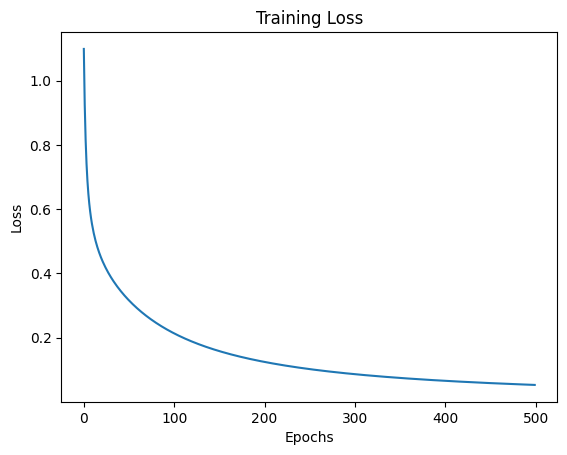

In [4]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


Train Sklearn Logistic Regression for comparison

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=500
)

model.fit(X, y)

y_pred_sklearn = model.predict(X)
acc_sklearn = model.score(X, y)

print("Sklearn Accuracy:", acc_sklearn)
print("Sklearn Predictions:", y_pred_sklearn)

TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'multi_class'